<a href="https://www.kaggle.com/code/tornikeonoprishvili/fdtd-simulation?scriptVersionId=92300902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import pi
from numpy import sqrt

eps0 = 8.85418782e-12
miu0 = 4*pi*1e-7
c0 = 1/sqrt(miu0*eps0)

In [3]:
# NBUFF   = [5, 5, 5, 5];
# NLAM    = 25;
# NDIM    = 3;

# NCELL   = [18 18];
# CELLS   = [6 10];

In [4]:
!pip install fdtd

     |████████████████████████████████| 44 kB 1.1 MB/s             


In [5]:
import fdtd

In [6]:
fdtd.set_backend("numpy")

```python
fdtd.Grid(
    shape,
    grid_spacing: float = 155e-9,
    permittivity: float = 1.0,
    permeability: float = 1.0,
    courant_number: float = None,
)
```

In [7]:
nm = 1e-9

In [68]:
# vortex = np.zeros((6,6))

# moves = np.array([[0,1],[1,0],[0,-1],[0,-1]])
# start = np.array((0,0))
# val = 0

# def is_good(dims,start):
#     start 

# while True:
#     vortex[start] = val
#     for move in moves:
#         new_start = start + move
#         if is_good(vortex.shape, new_start):
#             start = new_start
#             break
#     val += 1
    
# # vortex[start]


In [136]:
vortex = [
    ['v'] + ['<'] * 5,
    ['v'] * 2 + ['<'] * 3 + ['^'],
    ['v'] * 3 + ['<'] + ['^'] * 2,
    ['v'] * 2 + ['>'] + ['^'] + ['^'] * 2,
    ['v'] * 1 + ['>'] * 3 + ['^'] * 2,
    ['>'] * 5 + ['^'],
]
vortex = np.array(vortex)
rads = [3*pi/2,0,pi/2,pi]
for a,b in zip(list('v>^<'),rads):
    vortex = np.where(vortex == a,b,vortex)
vortex = vortex.astype('float32')

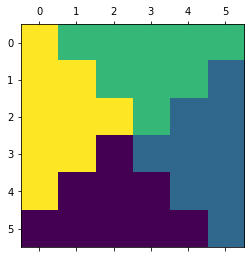

In [137]:
import matplotlib.pyplot as plt
plt.matshow(vortex)

In [139]:
def eps_fun(phi):
    k = 1.5
    eps_1 = 1 - k * np.sin(phi)**2
    eps_2 = k * np.sin(phi) * np.cos(phi)
    eps_3 = 1 - k * np.cos(phi)**2
#     eps = np.array([
#         [eps_1,eps_2],
#         [eps_2, eps_3]
#     ])
    eps = np.stack([eps_1,eps_2,eps_3],2)
    eps = eps.astype('float32')
    return eps


vortex_eps = eps_fun(vortex)

In [140]:
vortex_eps.shape

(6, 6, 3)

In [141]:
q = 1.6e-19
m = 9.109e-31
e_0 = 8.854e-12

<AxesSubplot:>

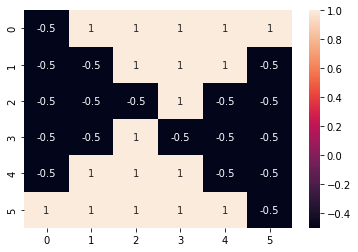

In [142]:
import seaborn as sns
sns.heatmap(vortex_eps[...,0],annot=True)

<AxesSubplot:>

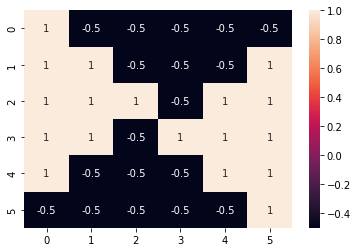

In [143]:
import seaborn as sns
sns.heatmap(vortex_eps[...,2],annot=True)

In [150]:
air_eps = np.ones((6,6),'float32')

In [158]:
grid_plan = np.array([
    ['a'] * 6,
    *[['x'] * 6, 
      ['a'] * 6] * 10,
])
grid_plan

array([['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a']], dtype='<U1')

In [167]:
pml_width = np.array([10,10])
Px,Py = np.array(grid_plan.shape) * 6 + pml_width * 2
grid = np.ones((Px,Py))
grid.shape

(146, 56)

In [177]:
grid_plan_2 = grid_plan.repeat(6,0).repeat(6,1)
grid_plan_2 = grid_plan_2[...,None].repeat(3,2)

In [178]:
np.where(grid_plan == 'a',air_eps,vortex_eps)

ValueError: operands could not be broadcast together with shapes (21,6) (6,6) (6,6,3) 

In [ ]:
# grid = fdtd.Grid(
#     shape = (25e-6, 15e-6, 1), # 25um x 15um x 1 (grid_spacing) --> 2D FDTD
# )


grid = fdtd.Grid(
    shape = (170,56,1),
    grid_spacing=4 * nm,
)

In [ ]:
# x boundaries
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

In [ ]:
grid

```python
fdtd.LineSource(
    period: Number = 15, # timesteps or seconds
    amplitude: float = 1.0,
    phase_shift: float = 0.0,
    name: str = None,
)
```

In [ ]:
grid.visualize(z=0)

In [ ]:
grid[25, :, 0] = fdtd.LineSource(
    period = 1550e-9 / (3e8), name="source"
)

```python
fdtd.PML(
    a: float = 1e-8, # stability factor
    name: str = None
)
```

In [ ]:
grid

In [ ]:
grid

In [ ]:
grid[13e-6:18e-6, 5e-6:8e-6, 0] = fdtd.Object(permittivity=1.5**2)

In [ ]:
grid[11:32, 30:84, 0] = fdtd.Object(permittivity=1.7**2, name="object")

In [ ]:
print(grid)

In [ ]:
1.55e-7 * 75

In [ ]:
grid[12e-6, :, 0] = fdtd.LineDetector(name="detector")

In [ ]:
grid.reset()
grid.run(total_time=100)

```python
grid.visualize(
    grid,
    x=None,
    y=None,
    z=None,
    cmap="Blues",
    pbcolor="C3",
    pmlcolor=(0, 0, 0, 0.1),
    objcolor=(1, 0, 0, 0.1),
    srccolor="C0",
    detcolor="C2",
    show=True,
)
```

In [ ]:
import matplotlib.pyplot as plt
grid.visualize(z=0, show=True)